In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
import numpy as np
import h5py
    

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_size = (180,180)
batch_size = 32

class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory("/content/gdrive/My Drive/Soil Data Set New/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory("/content/gdrive/My Drive/Soil Data Set New/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Mounted at /content/gdrive


OSError: ignored

In [ ]:
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/kaggle/input/aulas-keras/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8

Number of images in the train set :  2264
Number of images in the test set ;  350
Number of images in prediction set :  4


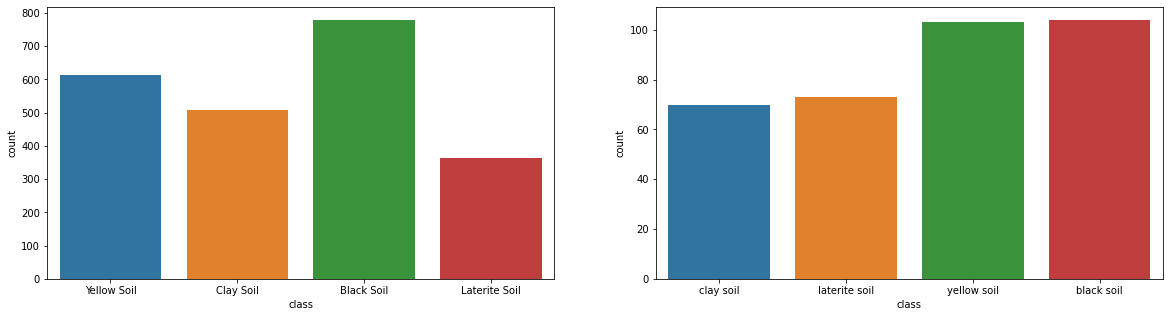

In [ ]:
quantity_tr = {} 
quantity_te = {}
for folder in os.listdir(train_path):
    quantity_tr[folder] = len(os.listdir(train_path + "/" + folder))

for folder in os.listdir(test_path):
    quantity_te[folder] = len(os.listdir(test_path + "/" + folder))
    
quantity_train = pd.DataFrame(list(quantity_tr.items()), index=range(0,len(quantity_tr)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_te.items()), index=range(0,len(quantity_te)), columns=['class','count'])

figure, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Number of images in the train set : ", sum(quantity_tr.values()))
print("Number of images in the test set ; ",sum(quantity_te.values()))
number_of_images_in_prediction_set = len(os.listdir(test_path))
print("Number of images in prediction set : ",number_of_images_in_prediction_set)

plt.show()

In [ ]:
def save_history(history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = model_name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save to csv: 
    hist_csv_file = model_name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
    
def plot_loss_from_history(history):
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
    
def do_history_stuff(history, history_file_name, isinception=False):
    save_history(history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)

# we are rescaling by 1.0/255 to normalize the rgb values if they are in range 0-255 the values are too high for good model performance. 
train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale = 1.0/255.) #we are only normalising to make the prediction, the other parameters were used for agumentation and train weights
validation_generator = validation_datagen.flow_from_directory(test_path, shuffle=True, batch_size=1, class_mode='categorical', target_size=(150, 150))

Found 2264 images belonging to 4 classes.
Found 350 images belonging to 4 classes.


In [ ]:
def show_few_images(number_of_examples=2, predict_using_model=None):
    figure1, ax1 = plt.subplots(number_of_examples,len(os.listdir(seg_train_folders)), figsize=(20,4*number_of_examples))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    for i, folder in enumerate(os.listdir(seg_train_folders)):
        image_ids = os.listdir(os.path.join(seg_train_folders,folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_examples)]:
            
            display = plt.imread(os.path.join(seg_train_folders,folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(predict_using_model):
                predicted_classname = inv_map_classes[np.argmax(inception_best_model.predict(np.array([display])))]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1

In [ ]:
tf.keras.backend.clear_session()

# epoch config
benchmark_epoch = 60
vgg_epoch = 60
resnet_epoch = 60
inception_epoch = 60

In [ ]:
#random architecture
benchmark_model = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
benchmark_model.add(Conv2D(128, kernel_size=7, activation='relu', input_shape=(150,150,3)))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Conv2D(64, kernel_size=5, activation='relu'))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Flatten())
benchmark_model.add(Dense(128,activation='relu'))
benchmark_model.add(Dense(4,activation='softmax'))

benchmark_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

benchmark_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_282 (Conv2D)         (None, 144, 144, 128)     18944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 71, 71, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_283 (Conv2D)         (None, 67, 67, 64)        204864    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               8

In [ ]:
plot_model(benchmark_model, to_file='model.png',show_shapes=True, show_layer_names=True)
from IPython.display import FileLink
FileLink(r'./resnet50_-saved-model-08-acc-0.75.hdf5')

/content/resnet50_-saved-model-08-acc-0.75.hdf5

In [ ]:
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3), classes=4)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
# resnet50_x = Conv2D(64, (3, 3), activation='relu')(ResNet50_model.output)
# resnet50_x = MaxPooling2D(pool_size=(3, 3))(resnet50_x)
resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(256,activation='relu')(resnet50_x)
resnet50_x = Dense(4,activation='softmax')(resnet50_x)
resnet50_x_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
resnet50_x_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = resnet50_x_final_model.fit(train_generator, epochs = number_of_epochs ,validation_data= validation_generator,callbacks=callbacklist,verbose=1)

#do_history_stuff(resnet50_history, 'resnet50_model')

Epoch 1/10
71/71 [==============================] - ETA: 0s - loss: 1.2733 - acc: 0.8812 

KeyboardInterrupt: ignored

In [ ]:

InceptionV3_model = InceptionV3(input_shape=(150,150,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.5)(InceptionV3_x)
InceptionV3_x = Dense(4, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])


inception_filepath = 'inceptionv3_'+'-saved-model-{epoch:02d}-loss-{loss:.2f}.hdf5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = 10, validation_data = validation_generator,callbacks=[inception_checkpoint,inception_early_stopping],verbose=1)

#do_history_stuff(inceptionv3_history, 'inceptionv3_model', True) 

87924736/87910968 [==============================] - 2s 0us/step
Epoch 1/10
71/71 [==============================] - ETA: 0s - loss: 1.1888 - accuracy: 0.5172

71/71 [==============================] - 407s 6s/step - loss: 1.1888 - accuracy: 0.5172 - val_loss: 1.0015 - val_accuracy: 0.6686
Epoch 2/10
71/71 [==============================] - ETA: 0s - loss: 0.6408 - accuracy: 0.7783

71/71 [==============================] - 195s 3s/step - loss: 0.6408 - accuracy: 0.7783 - val_loss: 0.7481 - val_accuracy: 0.7371
Epoch 3/10
71/71 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.8511

71/71 [==============================] - 190s 3s/step - loss: 0.4561 - accuracy: 0.8511 - val_loss: 0.5610 - val_accuracy: 0.7971
Epoch 4/10
71/71 [==============================] - ETA: 0s - loss: 0.3441 - accuracy: 0.8913

71/71 [==============================] - 192s 3s/step - loss: 0.3441 - accuracy: 0.8913 - val_loss: 0.4479 - val_accuracy: 0.8400
Epoch 5/10
71/71 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9254

71/71 [==============================] - 192s 3s/step - loss: 0.2498 - accuracy: 0.9254 - val_loss: 0.3855 - val_accuracy: 0.8657
Epoch 6/10
71/71 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9355

71/71 [==============================] - 192s 3s/step - loss: 0.2136 - accuracy: 0.9355 - val_loss: 0.3929 - val_accuracy: 0.8600
Epoch 7/10
71/71 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9470

71/71 [==============================] - 189s 3s/step - loss: 0.1834 - accuracy: 0.9470 - val_loss: 0.3398 - val_accuracy: 0.8943
Epoch 8/10
71/71 [==============================] - ETA: 0s - loss: 0.1562 - accuracy: 0.9549

71/71 [==============================] - 188s 3s/step - loss: 0.1562 - accuracy: 0.9549 - val_loss: 0.3247 - val_accuracy: 0.8971
Epoch 9/10
71/71 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.9625

71/71 [==============================] - 185s 3s/step - loss: 0.1348 - accuracy: 0.9625 - val_loss: 0.4022 - val_accuracy: 0.8600
Epoch 10/10
71/71 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9700

71/71 [==============================] - 187s 3s/step - loss: 0.1138 - accuracy: 0.9700 - val_loss: 0.3676 - val_accuracy: 0.8629


In [ ]:
vgg_best_model = vgg16_final_model 
resnet_best_model = resnet50_x_final_model
inception_best_model = InceptionV3_x_final_model 

In [ ]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(150,150,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(4, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
number_of_epochs = 10
vgg16_filepath = 'vgg_16_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
vgg16_history = vgg16_final_model.fit(train_generator, epochs = number_of_epochs ,validation_data = validation_generator,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)

#do_history_stuff(vgg16_history, 'vgg16_model')

Epoch 1/10
 4/71 [>.............................] - ETA: 7:58 - loss: 1.3506 - acc: 0.4531

KeyboardInterrupt: ignored

In [ ]:

inception_best_model = InceptionV3_x_final_model 


true_value = []

inception_pred = []

for folder in os.listdir(test_path):
    
    test_image_ids = os.listdir(os.path.join(test_path,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_path,folder,image_id)
        
        true_value.append(validation_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(150,150))
        img_normalized = img/255
        
        
        #Inception
        inception_image_prediction = np.argmax(inception_best_model.predict(np.array([img_normalized])))
        inception_pred.append(inception_image_prediction)
        
        

In [ ]:
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
value=[]
  
for folder in os.listdir(train_path):
    
    train_image_ids = os.listdir(os.path.join(train_path,folder))
    
    for image_id in train_image_ids[:int(len(train_image_ids))]:
        
        path = os.path.join(train_path,folder,image_id)
        
        
        img = cv2.resize(cv2.imread(path),(150,150))
        img_normalized = img/255
        img_numpy_array = img_to_array(img)
        value.append(img_numpy_array.reshape)
  

In [ ]:
from sklearn import svm
X_train=value
X_test=inception_pred

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train,X_test)

#Predict the response for test dataset
y_pred = clf.predict(test_generator)


TypeError: ignored

In [ ]:


X_train=value
X_test=inception_pred

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = validation_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer
y = combined_model_pred
MultiLabelBinarizer().fit_transform(y)


array([[0, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       ...,
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1]])

In [ ]:
clf_report(true_value,y)


Model Accuracy 0.0


ValueError: ignored

<Figure size 504x504 with 0 Axes>

Model Accuracy 0.29428571428571426
               precision    recall  f1-score   support

   black soil       0.00      0.00      0.00       104
    clay soil       0.00      0.00      0.00        70
laterite soil       0.00      0.00      0.00        73
  yellow soil       0.29      1.00      0.45       103

     accuracy                           0.29       350
    macro avg       0.07      0.25      0.11       350
 weighted avg       0.09      0.29      0.13       350



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


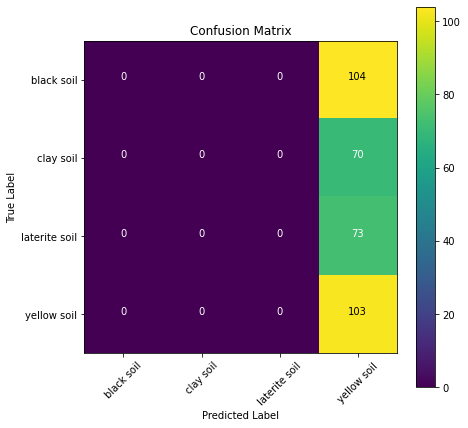

In [ ]:
clf_report(true_value, resnet_pred)

Model Accuracy 0.3942857142857143
               precision    recall  f1-score   support

   black soil       0.34      1.00      0.51       104
    clay soil       1.00      0.30      0.46        70
laterite soil       0.00      0.00      0.00        73
  yellow soil       0.48      0.13      0.20       103

     accuracy                           0.39       350
    macro avg       0.46      0.36      0.29       350
 weighted avg       0.44      0.39      0.30       350



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


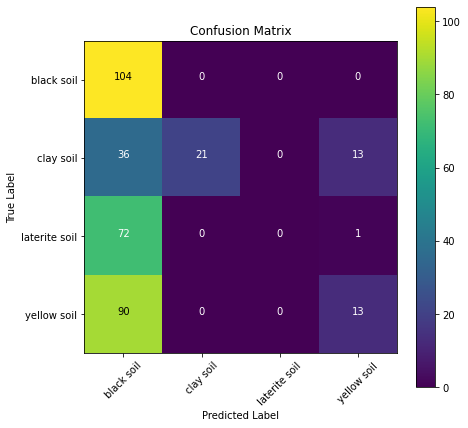

In [ ]:
# VGG model classification report
clf_report(true_value, vgg_pred)

Model Accuracy 0.8114285714285714
               precision    recall  f1-score   support

   black soil       0.79      0.99      0.88       104
    clay soil       0.91      0.71      0.80        70
laterite soil       0.79      0.56      0.66        73
  yellow soil       0.80      0.87      0.84       103

     accuracy                           0.81       350
    macro avg       0.82      0.79      0.79       350
 weighted avg       0.82      0.81      0.80       350



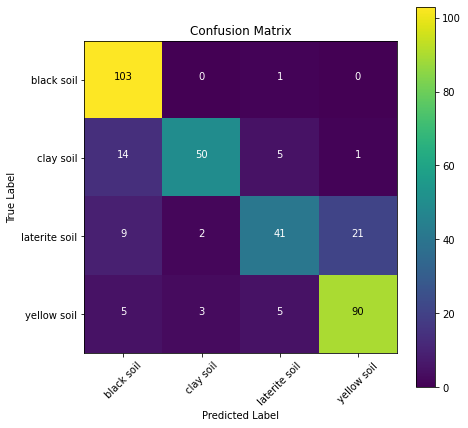

In [ ]:
# Inception model classification report
clf_report(true_value, inception_pred)